In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snp

In [3]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [4]:
new_df=df.rename(
    columns=({
              'Sell Price($)': 'Sell_price',
              'Age(yrs)': 'age',
              'Car Model':'car_model'
              
              
              
    }))
new_df

,car_model,Mileage,Sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


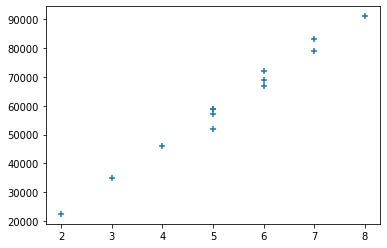

In [5]:
plt.scatter(x='age',y='Mileage',data=new_df,marker='+')


In [6]:
dummies=pd.get_dummies(new_df['car_model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [7]:
merged = pd.concat([new_df,dummies],axis='columns')
merged

,car_model,Mileage,Sell_price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [8]:
final=merged.drop(['Mercedez Benz C class','car_model'],axis=1)
final

,Mileage,Sell_price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [9]:
x=final.drop(['Sell_price'],axis=1)
x

,Mileage,age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
y=final.Sell_price
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_price, dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.predict(x)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [14]:
model.score(x,y)

0.9417050937281083

# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [15]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [21]:
new_df.Sell_price.shape

(13,)

ValueError: shapes (13,1) and (4,) not aligned: 1 (dim 1) != 4 (dim 0)

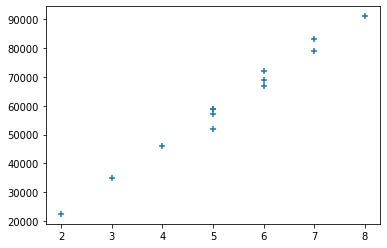

In [17]:
plt.scatter(x='age',y='Mileage',data=new_df,marker='+')
plt.plot(new_df.Sell_price,model.predict(new_df[['Sell_price']]),color='blue')

# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000



In [ ]:
model.predict([[86000,7,0,1]])

In [ ]:
model.predict([[83000,7,0,0]])

In [ ]:
model.score(x,y)